In [2]:
import pandas as pd

# Load the data
data = pd.read_csv(' ') #your file location here

# Show the first few rows of the data
data.head()

,PatientID,Gender,Subluxation_percent,Femoral_neck_angle,Lateral_center_edge_angle,extrusion_index,Femoral_anteversion,Acetabular_anteversion,Anterior_sector_angle,Posterior_sector_angle
0,1,M,0.439726,138.7,17.3,0.456075,48.50,12.0,36.0,69.4
1,2,F,0.000000,136.2,11.5,0.349057,19.20,15.9,55.5,90.0
2,3,F,0.000000,139.9,11.5,0.295238,33.95,19.9,51.8,94.2
3,4,M,0.484536,136.6,-18.1,0.773196,36.10,10.5,42.3,74.1
4,5,M,0.225806,153.7,-5.3,0.512799,29.30,11.8,53.7,76.7


In [3]:
from sklearn.cluster import AgglomerativeClustering

# Exclude 'PatientID' and 'Gender' columns
data_clustering = data.drop(['PatientID', 'Gender'], axis=1)

# Choose linkage method - we'll start with 'ward'
linkage = 'ward'

# Perform hierarchical clustering
hclust = AgglomerativeClustering(linkage=linkage)
hclust.fit(data_clustering)

AgglomerativeClustering()

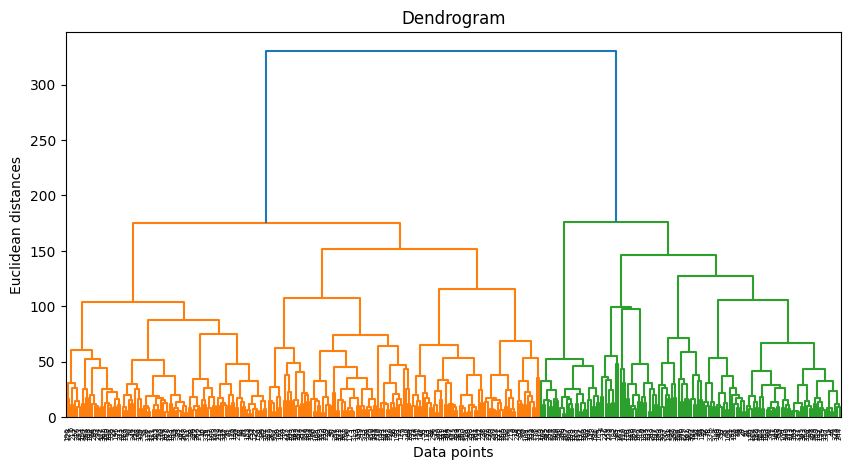

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(data_clustering, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

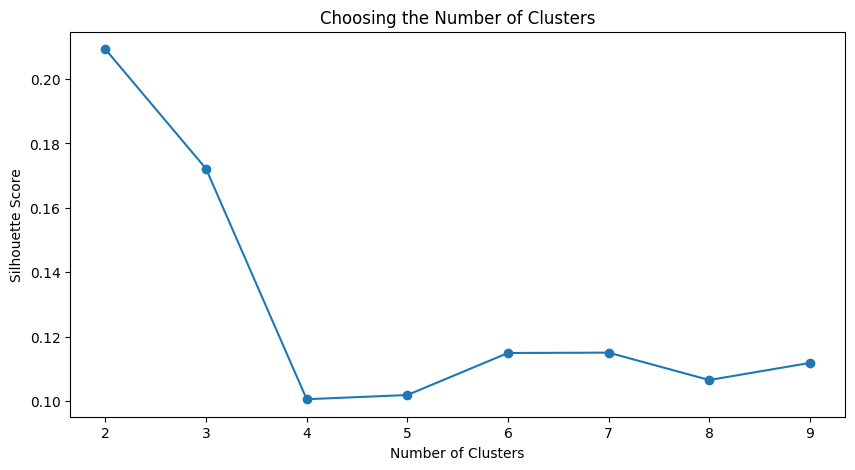

In [5]:
from sklearn.metrics import silhouette_score

# Range of possible clusters
range_n_clusters = list(range(2,10))

# List to hold silhouette scores
silhouette_scores = []

# Compute silhouette scores for different numbers of clusters
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    preds = clusterer.fit_predict(data_clustering)
    score = silhouette_score(data_clustering, preds)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.title('Choosing the Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [6]:
# Choose the number of clusters
n_clusters = 2

# Create an instance of AgglomerativeClustering with the chosen number of clusters
hclust = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model and predict the cluster for each data point
data['Cluster'] = hclust.fit_predict(data_clustering)

# Display the data with the cluster assignments
data.head()

,PatientID,Gender,Subluxation_percent,Femoral_neck_angle,Lateral_center_edge_angle,extrusion_index,Femoral_anteversion,Acetabular_anteversion,Anterior_sector_angle,Posterior_sector_angle,Cluster
0,1,M,0.439726,138.7,17.3,0.456075,48.50,12.0,36.0,69.4,0
1,2,F,0.000000,136.2,11.5,0.349057,19.20,15.9,55.5,90.0,1
2,3,F,0.000000,139.9,11.5,0.295238,33.95,19.9,51.8,94.2,0
3,4,M,0.484536,136.6,-18.1,0.773196,36.10,10.5,42.3,74.1,0
4,5,M,0.225806,153.7,-5.3,0.512799,29.30,11.8,53.7,76.7,0
